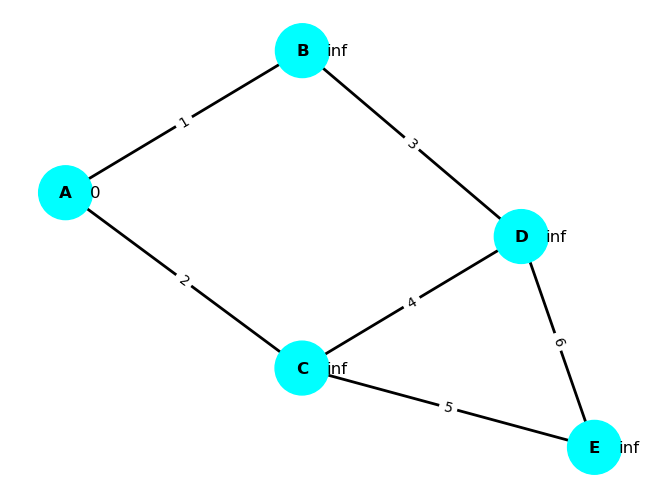

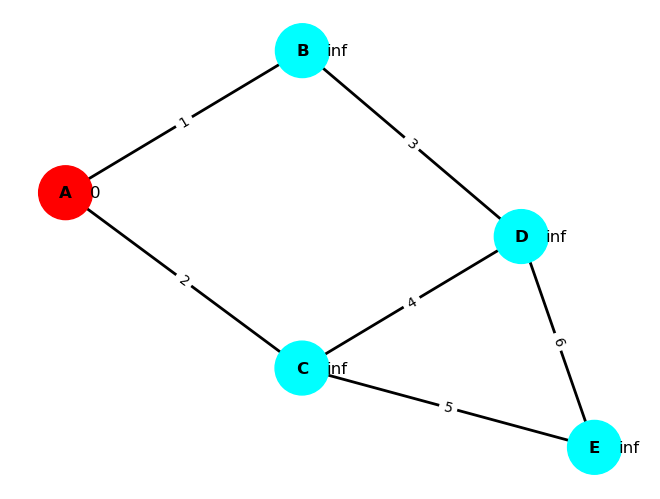

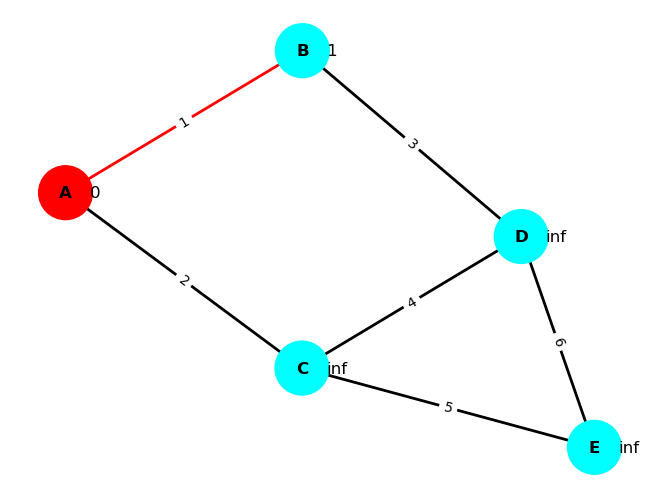

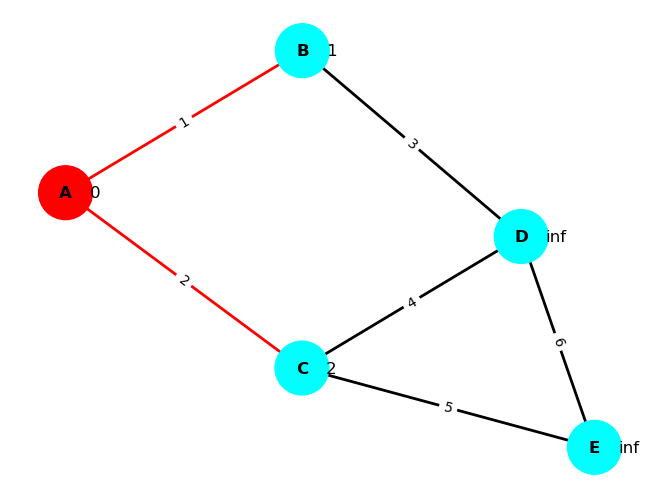

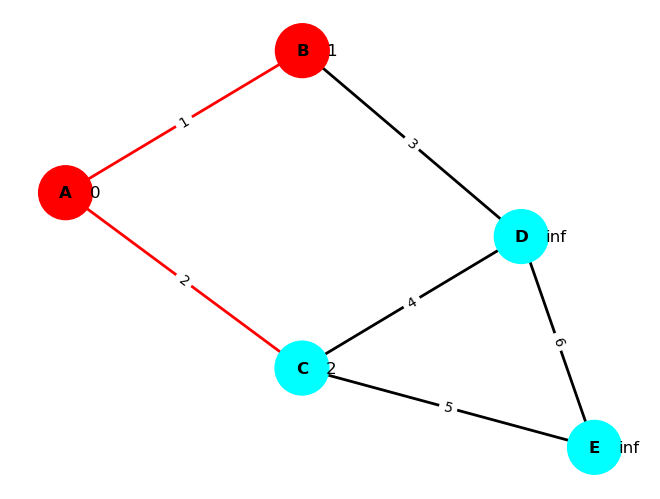

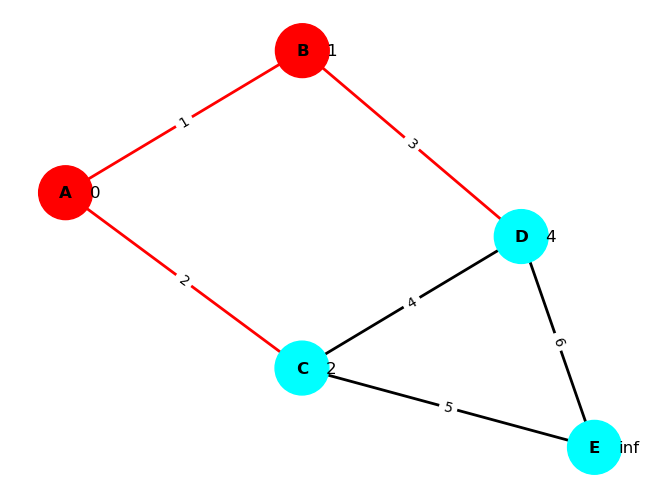

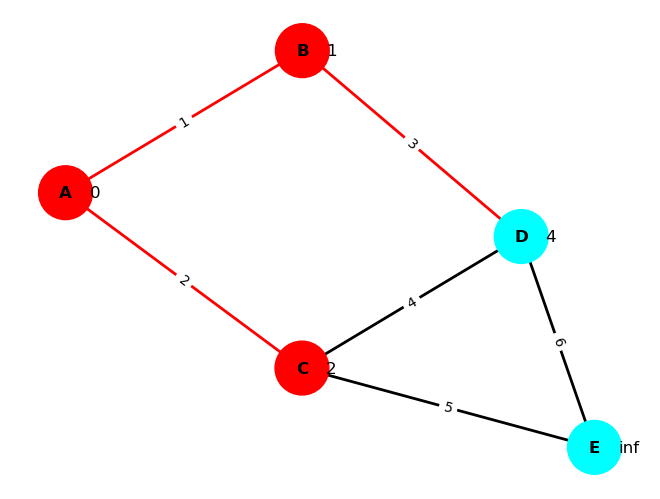

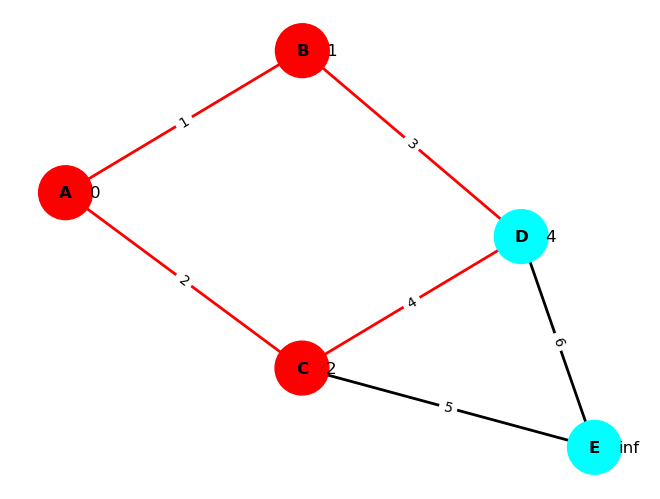

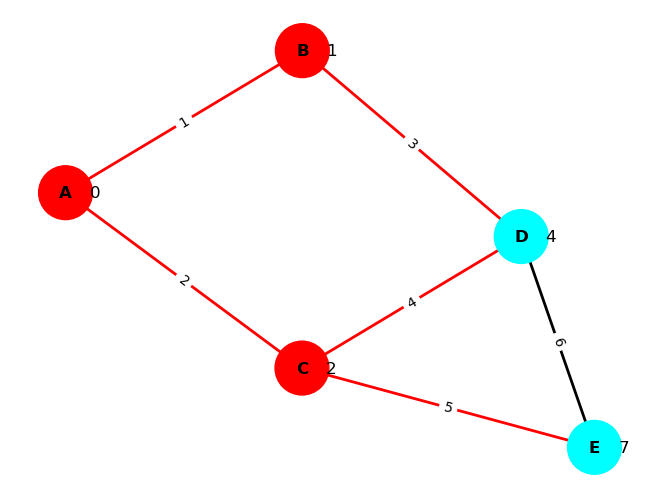

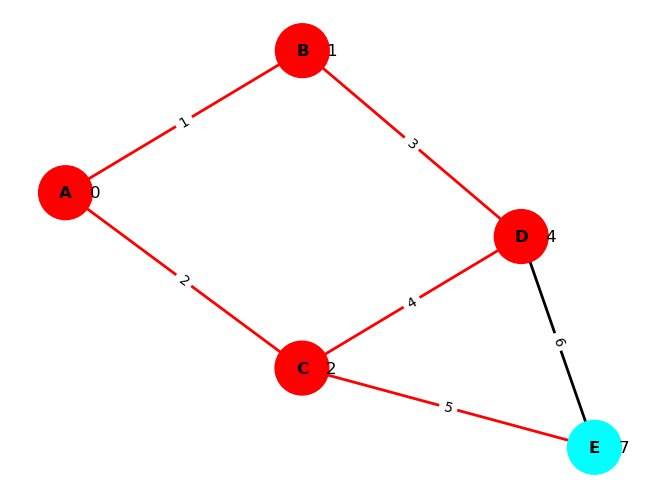

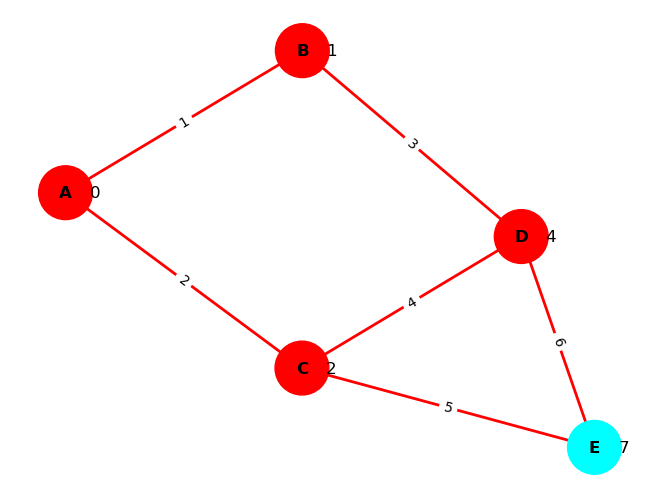

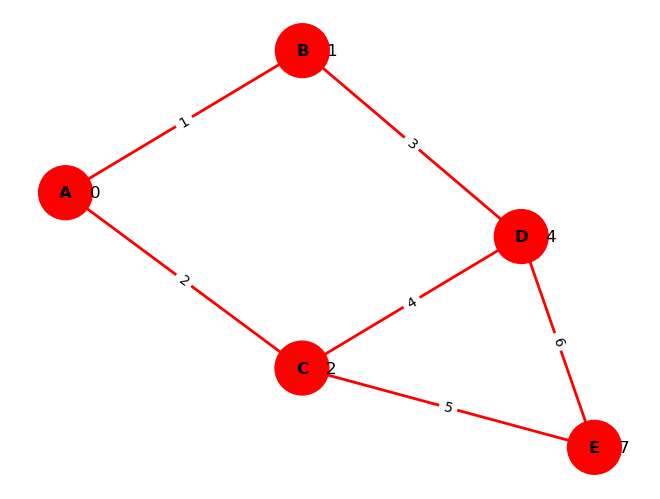

Пройден весь граф


In [2]:
import matplotlib.pyplot as plt
import networkx as nx


def rendering():
    # рисуем граф и отображаем его:
    nx.draw(G, pos, with_labels=True, font_weight='bold', **options)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_size, font_color='black' )
    nx.draw_networkx_labels(G, shifted_pos, labels=length_ways, horizontalalignment="left")
    plt.show()
    return


G = nx.Graph()  # создаём объект графа

# определяем список узлов (ID узлов)
nodes = ['A', 'B', 'C', 'D', 'E']
edge_svet = ['black','black','black','black','black', 'black']
node_svet = ['cyan','cyan','cyan','cyan','cyan']

options = {
    'node_color': node_svet,
    'node_size': 1500,
    'width': 2,
    'edge_color': edge_svet
}

# определяем список рёбер
# список кортежей, каждый из которых представляет ребро
# кортеж (id_1, id_2) означает, что узлы id_1 и id_2 соединены ребром
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]
work_edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]

# добавляем информацию в объект графа
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.spring_layout(G)

shift = [0.08, 0]
shifted_pos = {node: node_pos + shift for node, node_pos in pos.items()}

edge_size = {('A', 'B') : 1, ('A', 'C') : 2, 
             ('B', 'D') : 3, ('C', 'D') : 4,
             ('C', 'E') : 5, ('D', 'E') : 6}

length_ways = {'A' : 0, 'B' : float('infinity'),
               'C' : float('infinity'), 'D' : float('infinity'),
               'E' : float('infinity')}

work_nodes = {'A' : 0, 'B' : float('infinity'),
            'C' : float('infinity'), 'D' : float('infinity'),
            'E' : float('infinity')}

rendering()

for i in range(10):
    current_node = min(work_nodes, key = work_nodes.get) # текущая нода
    current_way = work_nodes[current_node] # значенние пути до текущей ноды
    node_svet[nodes.index(current_node)] = 'red'
    rendering()
    
    del work_nodes[current_node]

    sviaz = [item for item in work_edges if current_node in item] # ребра текущей ноды
    if sviaz:
        for j in range(len(sviaz)):
            edge_svet[edges.index(sviaz[j])] = 'red'
            
            way = current_way + edge_size[sviaz[j]] # длина пути от начальной точки с учетом длинны ребра            
            # костыль для выбора вершины, в которую прокладываем путь:
            if sviaz[j][0] == current_node: 
                choice_node = sviaz[j][1]
            else:
                choice_node = sviaz[j][0]
            
            if way < length_ways[choice_node]:
                length_ways[choice_node] = way
                work_nodes[choice_node] = way
            
            work_edges.remove(sviaz[j])
            rendering()

    if len(work_nodes) == 0:
        print('Пройден весь граф')
        break


Пройден весь граф:
Можно жмакать ESC


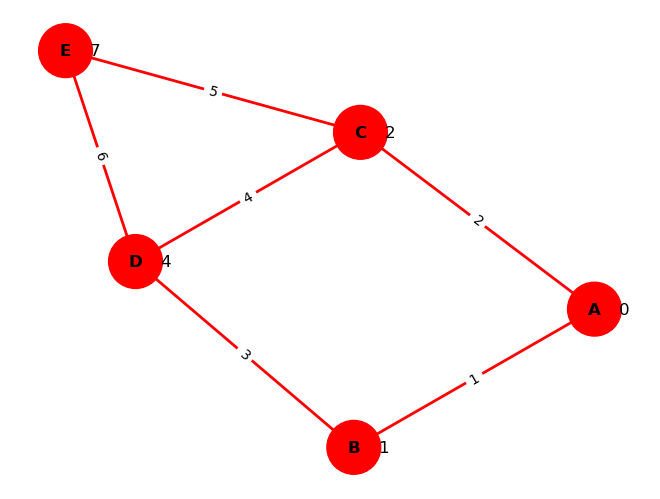

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import cv2
import os


def rendering():
    # рисуем граф и отображаем его:
    global counter
    counter += 1
    plt.clf()
    nx.draw(G, pos, with_labels=True, font_weight='bold', **options)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_size, font_color='black' )
    nx.draw_networkx_labels(G, shifted_pos, labels=length_ways, horizontalalignment="left")
    plt.savefig(f'lab1/{counter}.png')
    return

def animation():
    folder_path = 'lab1/'#folder path to your images

    for path in os.listdir(folder_path): #loop to read one image at a time 
        imgpath = os.path.join(folder_path, path)
        frame = cv2.imread(imgpath, 1)
        cv2.imshow('Window', frame)

        key = cv2.waitKey(1000)#pauses for 3 seconds before fetching next image
        if key == 27: #if ESC is pressed, exit loop
            cv2.destroyAllWindows()
            break
    print('Можно жмакать ESC')
    cv2.waitKey(0)
    cv2.destroyAllWindows()

start = 'A' # стартовая точка
    
G = nx.Graph()  # создаём объект графа

# определяем список узлов (ID узлов)
nodes = ['A', 'B', 'C', 'D', 'E']
edge_svet = ['black','black','black','black','black', 'black']
node_svet = ['cyan','cyan','cyan','cyan','cyan']

options = {
    'node_color': node_svet,
    'node_size': 1500,
    'width': 2,
    'edge_color': edge_svet
}

# определяем список рёбер
# список кортежей, каждый из которых представляет ребро
# кортеж (id_1, id_2) означает, что узлы id_1 и id_2 соединены ребром
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]
work_edges = edges.copy()

# добавляем информацию в объект графа
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.spring_layout(G)

shift = [0.08, 0]
shifted_pos = {node: node_pos + shift for node, node_pos in pos.items()}

edge_size = {('A', 'B') : 1, ('A', 'C') : 2, 
             ('B', 'D') : 3, ('C', 'D') : 4,
             ('C', 'E') : 5, ('D', 'E') : 6}

length_ways = {'A' : float('infinity'), 'B' : float('infinity'),
               'C' : float('infinity'), 'D' : float('infinity'),
               'E' : float('infinity')}
length_ways[start] = 0
work_nodes = length_ways.copy()

counter = 10 # начинаем с 10 для правильного отображения изображений
rendering()

while True:
    current_node = min(work_nodes, key = work_nodes.get) # текущая нода
    current_way = work_nodes[current_node] # значенние пути до текущей ноды
    node_svet[nodes.index(current_node)] = 'red'
    rendering()
    
    del work_nodes[current_node]

    sviaz = [item for item in work_edges if current_node in item] # ребра текущей ноды
    if sviaz:
        for j in range(len(sviaz)):
            edge_svet[edges.index(sviaz[j])] = 'red'
            
            way = current_way + edge_size[sviaz[j]] # длина пути от начальной точки с учетом длинны ребра            
            
            # костыль для выбора вершины, в которую прокладываем путь:
            if sviaz[j][0] == current_node: 
                choice_node = sviaz[j][1]
            else:
                choice_node = sviaz[j][0]
            
            if way < length_ways[choice_node]:
                length_ways[choice_node] = way
                work_nodes[choice_node] = way
            
            work_edges.remove(sviaz[j])
            rendering()

    if len(work_nodes) == 0:
        print('Пройден весь граф:')
        break

animation()

Цель достигнута. Длина пути = 6
Можно жмакать ESC


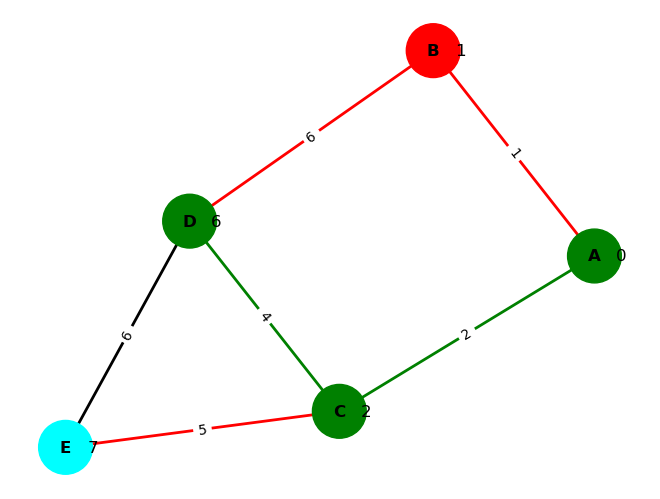

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import cv2
import os


def A_star():
#     идём от целевой точки к стартовой
    current_node = goal
    
    while (current_node != start):
        goal_edge = short_path_edges[current_node] 
        current_node = short_path_nodes[current_node]
        
        edge_svet[edges.index(goal_edge)] = 'green'     
        node_svet[nodes.index(current_node)] = 'green'
    rendering()
        

def rendering():
    # рисуем граф и сохраняем его его:
    global counter
    counter += 1
    plt.clf() # очишение plot
    # подготовка графа:
    nx.draw(G, pos, with_labels=True, font_weight='bold', **options)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_size, font_color='black' )
    nx.draw_networkx_labels(G, shifted_pos, labels=length_ways, horizontalalignment="left")
    plt.savefig(f'lab1/{counter}.png') # сохранение изображения
    return

def animation():
    folder_path = 'lab1/'

    for path in os.listdir(folder_path):
        imgpath = os.path.join(folder_path, path)
        frame = cv2.imread(imgpath, 1)
        cv2.imshow('Window', frame)

        key = cv2.waitKey(1000)
        if key == 27:
            cv2.destroyAllWindows()
            break
    print('Можно жмакать ESC')
    cv2.waitKey(0)
    cv2.destroyAllWindows()


start = 'A' # стартовая точка
goal = 'D' # цель

short_path_nodes = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0,} # словарь путии до цели (по вершинам)
short_path_edges = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0,} # словарь путии до цели (по ребрам)

G = nx.Graph()  # создаём объект графа

# определяем список узлов (ID узлов)
nodes = ['A', 'B', 'C', 'D', 'E']
edge_svet = ['black','black','black','black','black', 'black']
node_svet = ['cyan','cyan','cyan','cyan','cyan']

options = {
    'node_color': node_svet,
    'node_size': 1500,
    'width': 2,
    'edge_color': edge_svet
}

# определяем список рёбер
# список кортежей, каждый из которых представляет ребро
# кортеж (id_1, id_2) означает, что узлы id_1 и id_2 соединены ребром
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]
work_edges = edges.copy()

# добавляем информацию в объект графа
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.spring_layout(G)

shift = [0.08, 0]
shifted_pos = {node: node_pos + shift for node, node_pos in pos.items()}

edge_size = {('A', 'B') : 1, ('A', 'C') : 2, 
             ('B', 'D') : 6, ('C', 'D') : 4,
             ('C', 'E') : 5, ('D', 'E') : 6}

length_ways = {'A' : float('infinity'), 'B' : float('infinity'),
               'C' : float('infinity'), 'D' : float('infinity'),
               'E' : float('infinity')}
length_ways[start] = 0
work_nodes = length_ways.copy()

counter = 10 # начинаем с 10 для правильного отображения изображений
rendering()

node_svet[nodes.index(goal)] = 'green'

while True:
    current_node = min(work_nodes, key = work_nodes.get) # текущая нода
    current_way = work_nodes[current_node] # значенние пути до текущей ноды
    if current_node == goal:
        A_star()
        print(f'Цель достигнута. Длина пути = {current_way}')
        break
    node_svet[nodes.index(current_node)] = 'red'
    rendering()
    
    del work_nodes[current_node]

    sviaz = [item for item in work_edges if current_node in item] # ребра текущей ноды
    if sviaz:
        for j in range(len(sviaz)):
            edge_svet[edges.index(sviaz[j])] = 'red'
            
            way = current_way + edge_size[sviaz[j]] # длина пути от начальной точки с учетом длинны ребра            
            
            # костыль для выбора вершины, в которую прокладываем путь:
            if sviaz[j][0] == current_node: 
                choice_node = sviaz[j][1]
            else:
                choice_node = sviaz[j][0]
            
            if way < length_ways[choice_node]:
                length_ways[choice_node] = way
                work_nodes[choice_node] = way
                short_path_nodes[choice_node] = current_node
                short_path_edges[choice_node] = sviaz[j]
            
            work_edges.remove(sviaz[j])
            rendering()

    if len(work_nodes) == 0:
        print('Пройден весь граф:')
        break

animation()

In [2]:
# Функция для вывода картинок на экран в отдельном окне:

import cv2
import os

def animation():
    folder_path = 'lab1' # папка в которой храняться изображения

    for path in os.listdir(folder_path): # цикл, в котором производиться чтение изображений из папки folder_path
        imgpath = os.path.join(folder_path, path) # чтение одного изображения из спиписка изображений папки folder_path

        frame = cv2.imread(imgpath, 1) # создание фрейма

        cv2.imshow('Window', frame) # вывод текущего изображения

        key = cv2.waitKey(3000) # пауза 3 секунды перед выводом следущего изображения
        if key == 27: # при нажатии ESC - закрытие приложения 
            cv2.destroyAllWindows()
            break

    cv2.waitKey(0) # нажимаем любую клавишу клавиатуры, чтобы закрыть окно по окончанию работы программы
    cv2.destroyAllWindows()
    
animation()

Пройден весь граф:
Можно жмакать ESC
{'Москва': 0, 'Санкт-Петербург': 10, 'Новосибирск': 8, 'Екатеринбург': 25, 'Казань': 9, 'Челябинск': 39, 'Уфа': 15, 'Самара': 21, 'Ростов-на-Дону': 15, 'Краснодар': 15, 'Пермь': 17, 'Волгоград': 13}


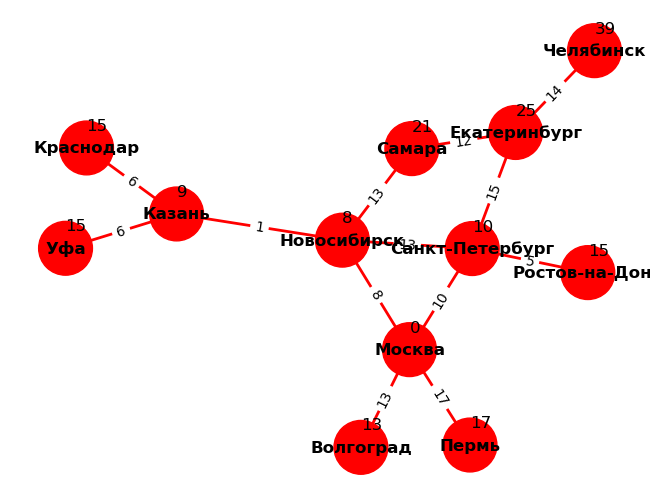

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import cv2
import os
import random


def rendering():
    # рисуем граф и отображаем его:
    global counter
    counter += 1
    plt.clf()
    nx.draw(G, pos, with_labels=True, font_weight='bold', **options)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_size, font_color='black' )
    nx.draw_networkx_labels(G, shifted_pos, labels=length_ways, horizontalalignment="left")
    plt.savefig(f'lab1/{counter}.png')
    return

def animation():
    folder_path = 'lab1/'#folder path to your images

    for path in os.listdir(folder_path): #loop to read one image at a time 
        imgpath = os.path.join(folder_path, path)
        frame = cv2.imread(imgpath, 1)
        cv2.imshow('Window', frame)

        key = cv2.waitKey(1000)#pauses for 3 seconds before fetching next image
        if key == 27: #if ESC is pressed, exit loop
            cv2.destroyAllWindows()
            break
    print('Можно жмакать ESC')
    cv2.waitKey(0)
    cv2.destroyAllWindows()

start = 'Москва' # стартовая точка
    
G = nx.Graph()  # создаём объект графа

# определяем список узлов (ID узлов)
nodes = ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Челябинск',
        'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Пермь', 'Волгоград']
node_svet = ['cyan' for i in nodes]

# определяем список рёбер
# список кортежей, каждый из которых представляет ребро
# кортеж (id_1, id_2) означает, что узлы id_1 и id_2 соединены ребром
edges = [('Москва', 'Санкт-Петербург'), 
         ('Москва', 'Новосибирск'),
         ('Москва', 'Волгоград'),
         ('Москва', 'Пермь'),
         ('Санкт-Петербург', 'Новосибирск'),
         ('Санкт-Петербург', 'Екатеринбург'),
         ('Санкт-Петербург', 'Ростов-на-Дону'),
         ('Новосибирск', 'Казань'),
         ('Новосибирск', 'Самара'),
         ('Екатеринбург', 'Самара'),
         ('Екатеринбург', 'Челябинск'),
         ('Казань', 'Уфа'),
         ('Казань', 'Краснодар')]
work_edges = edges.copy()
edge_svet = ['black' for i in edges]
edge_size = {i : random.randint(1,20) for i in edges}

options = {
    'node_color': node_svet,
    'node_size': 1500,
    'width': 2,
    'edge_color': edge_svet
}

# добавляем информацию в объект графа
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.spring_layout(G)

shift = [0, 0.08]
shifted_pos = {node: node_pos + shift for node, node_pos in pos.items()}

length_ways = {i : float('infinity') for i in nodes}

length_ways[start] = 0
work_nodes = length_ways.copy()

counter = 10 # начинаем с 10 для правильного отображения изображений
rendering()

while True:
    current_node = min(work_nodes, key = work_nodes.get) # текущая нода
    current_way = work_nodes[current_node] # значенние пути до текущей ноды
    node_svet[nodes.index(current_node)] = 'red'
    rendering()
    
    del work_nodes[current_node]

    sviaz = [item for item in work_edges if current_node in item] # ребра текущей ноды
    if sviaz:
        for j in range(len(sviaz)):
            edge_svet[edges.index(sviaz[j])] = 'red'
            
            way = current_way + edge_size[sviaz[j]] # длина пути от начальной точки с учетом длинны ребра            
            
            # костыль для выбора вершины, в которую прокладываем путь:
            if sviaz[j][0] == current_node: 
                choice_node = sviaz[j][1]
            else:
                choice_node = sviaz[j][0]
            
            if way < length_ways[choice_node]:
                length_ways[choice_node] = way
                work_nodes[choice_node] = way
            
            work_edges.remove(sviaz[j])
            rendering()

    if len(work_nodes) == 0:
        print('Пройден весь граф:')
        break

animation()
print(length_ways)

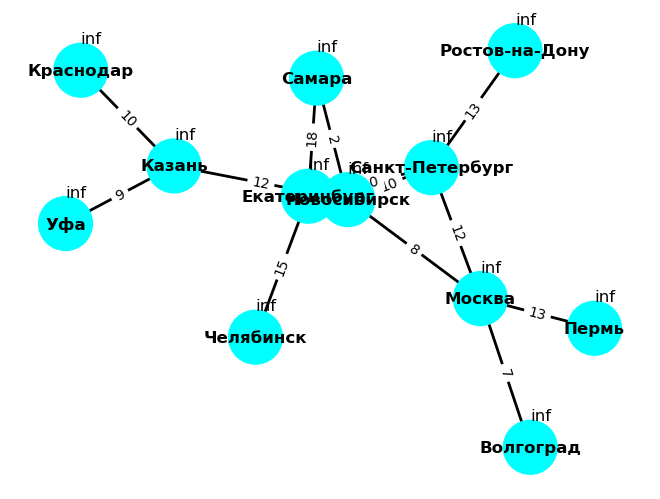

{('Москва', 'Санкт-Петербург'): 12, ('Москва', 'Новосибирск'): 8, ('Москва', 'Волгоград'): 7, ('Москва', 'Пермь'): 13, ('Санкт-Петербург', 'Новосибирск'): 10, ('Санкт-Петербург', 'Екатеринбург'): 10, ('Санкт-Петербург', 'Ростов-на-Дону'): 13, ('Новосибирск', 'Казань'): 12, ('Новосибирск', 'Самара'): 2, ('Екатеринбург', 'Самара'): 18, ('Екатеринбург', 'Челябинск'): 15, ('Казань', 'Уфа'): 9, ('Казань', 'Краснодар'): 10}
{'Москва': inf, 'Санкт-Петербург': inf, 'Новосибирск': inf, 'Екатеринбург': inf, 'Казань': inf, 'Челябинск': inf, 'Уфа': inf, 'Самара': inf, 'Ростов-на-Дону': inf, 'Краснодар': inf, 'Пермь': inf, 'Волгоград': inf}


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import cv2
import os
import random

G = nx.Graph()

edges = [('Москва', 'Санкт-Петербург'), 
         ('Москва', 'Новосибирск'),
         ('Москва', 'Волгоград'),
         ('Москва', 'Пермь'),
         ('Санкт-Петербург', 'Новосибирск'),
         ('Санкт-Петербург', 'Екатеринбург'),
         ('Санкт-Петербург', 'Ростов-на-Дону'),
         ('Новосибирск', 'Казань'),
         ('Новосибирск', 'Самара'),
         ('Екатеринбург', 'Самара'),
         ('Екатеринбург', 'Челябинск'),
         ('Казань', 'Уфа'),
         ('Казань', 'Краснодар')]
edge_size = {i : random.randint(1,20) for i in edges}

# nodes = ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Челябинск',
#         'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']

nodes = ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Челябинск',
        'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Пермь', 'Волгоград']

node_svet = ['cyan' for i in nodes]
#node_svet = ['cyan','cyan','cyan','cyan','cyan']

length_ways = {i : float('infinity') for i in nodes}

# length_ways = {'A' : float('infinity'), 'B' : float('infinity'),
#                'C' : float('infinity'), 'D' : float('infinity'),
#                'E' : float('infinity')}    
edge_svet = ['black' for i in edges]
options = {
    'node_color': node_svet,
    'node_size': 1500,
    'width': 2,
    'edge_color': edge_svet
}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
# pos = nx.circular_layout(G)


shift = [0, 0.08]
shifted_pos = {node: node_pos + shift for node, node_pos in pos.items()}

nx.draw(G, pos, with_labels=True, font_weight='bold', **options)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_size, font_color='black' )
nx.draw_networkx_labels(G, shifted_pos, labels=length_ways, horizontalalignment="left")
plt.show()

print(edge_size)
print(length_ways)